#DQN para resolver o problema Cartpole usando Keras RL

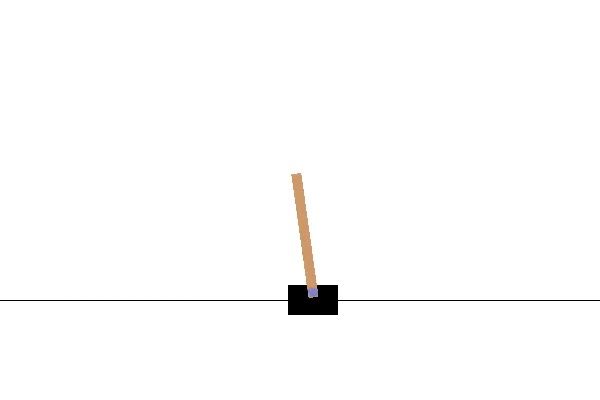

Documentação: https://gym.openai.com/envs/CartPole-v1/

O ambiente CartPole do Gym se resume a um carrinho que pode ir para esquerda ou direita e um poste que deve ficar o mais reto na vertical possível.

Ele é simples e permite que o programa seja executado rapidamente

## Fazendo instalação do keras-RL2

Lembrando que o keras-RL2 é feito com suporte para o tensorflow 2 (como o do colab) e o keras-RL para o tensorflow 1

In [13]:
!pip install keras-rl2

##Imports

In [14]:
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory

import matplotlib.pyplot as plt
%matplotlib inline

## Iniciando o ambiente

Lembrando que o Keras-RL tem suporte para os ambientes no formato da Biblioteca GYM

In [15]:
ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Duas ações possíveis ações: carrinho ir para direita e esquerda
print("Número de ações possíveis: " + str(nb_actions))

print("Número de variáveis no estado" + str(env.observation_space.shape))

Número de ações possíveis: 2
Número de variáveis no estado(4,)


## Criação da Rede neural

In [17]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)               

## Utilizando o Keras-RL

Utilizando o Keras-RL para realizar o treino do agente DQN para o ambiente Cartpole.

In [ ]:
# Finally, we configure and compile our agent. You can use every built-in tensorflow.keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=15000, window_length=1)
nb_steps = 25000

# LinearAnnealedPolicy is the function that determines dexay and EpsGreedyQPolicy is the epsilon greedy policy
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=0.3, value_min=.05, value_test=0,
                              nb_steps=nb_steps)

dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy, gamma=0.9)
dqn.compile(Adam(lr=1e-3), metrics=["mean_squared_error"])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
train_history = dqn.fit(env, nb_steps=nb_steps, visualize=False, verbose=2)

## Testando o Agente e salvando os pesos da rede

In [ ]:
# After training is done, we save the final weights.
dqn.save_weights(f'dqn_{ENV_NAME}_weights.h5f', overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=False)

## Plotando as recompensas do sistema ao longo do treino

In [ ]:
rewards = train_history.history['episode_reward']
plt.xlabel('Episode')
plt.ylabel('Sum of the rewards in the episode')
plt.plot(rewards)

print("Recompensa média do sistema para cada época usando DQN: " + str(sum(rewards)/len(rewards)) )
print()